In [ ]:
# 2 versions of model: 1 where we have transit_ptile, 1 where we have No_of_stops and PTover45min_pct

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc
import sklearn
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn as skl
import statsmodels.formula.api as smf
sns.set()

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/nfriedb1/DS4PH-Capstone-Neta-Xiang/main/DSPH_Capstone_Data.csv")
df = df.drop(df.loc[:, 'Unnamed: 12':'Unnamed: 23'].columns, axis = 1)
df = df.drop(["GEOID", "PTRAF"], axis = 1)
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df = df.drop(labels=[120, 403, 575], axis=0) #deleted rows with NA 
df

,ct,svi_ptile,transit_ptile,asthmavalue,PTRAF_bycensus,No_of_Stops,PTover45m_pct,lungCAvalue,CADvalue,LBWvalue
0,24510010100,0.045690,0.029276,0.087,685.684371,10,24.51,13,0.472,0.131
3,24510010200,0.015230,0.124807,0.082,686.778083,8,54.24,6,0.443,0.462
7,24510010300,0.005076,0.036980,0.082,1074.000000,6,15.38,1,0.313,0.106
9,24510010400,0.076140,0.033898,0.081,1072.952243,15,57.58,7,0.587,0.127
11,24510010500,0.081220,0.101695,0.083,1487.000000,2,50.77,1,0.384,0.176
...,...,...,...,...,...,...,...,...,...,...
635,24510280401,0.208100,0.805855,0.114,1104.810421,8,100.00,19,0.386,0.536
640,24510280402,0.360400,0.998459,0.119,731.266859,1,73.56,1,0.083,0.825
642,24510280403,0.213200,0.257319,0.114,649.600265,20,52.26,17,0.590,0.830
647,24510280404,0.832500,0.445300,0.124,1527.100404,10,52.66,12,0.321,0.853


In [88]:
## MODEL 1 ## 
# excludes No_of_Stops, PTover45m_pct
# variables: svi_ptile , transit_ptile , PTRAF_bycensus

In [89]:
y = df['asthmavalue']
x_model1 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct'], axis=1)
fit1 = LinearRegression().fit(x_model1, y)
yhat = fit1.predict(x_model1)
[fit1.intercept_,fit1.coef_]

[0.08819197913089867,
 array([ 4.84609339e-02,  7.47132629e-03, -9.52324789e-07])]

In [90]:
x_model1

,svi_ptile,transit_ptile,PTRAF_bycensus
0,0.045690,0.029276,685.684371
3,0.015230,0.124807,686.778083
7,0.005076,0.036980,1074.000000
9,0.076140,0.033898,1072.952243
11,0.081220,0.101695,1487.000000
...,...,...,...
635,0.208100,0.805855,1104.810421
640,0.360400,0.998459,731.266859
642,0.213200,0.257319,649.600265
647,0.832500,0.445300,1527.100404


In [120]:
b1 = fit1.coef_[0]
b2 = fit1.coef_[1]
b3 = fit1.coef_[2]
intercept = fit1.intercept_
print(b1, b2, b3)

0.0505568934981832 -1.4385469453733321e-06 -9.843720023020165e-05


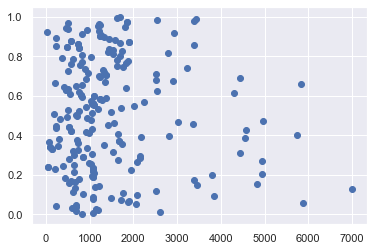

In [119]:
plt.plot(df['PTRAF_bycensus'], df['svi_ptile'], 'o')

In [109]:
results_model1 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile + PTRAF_bycensus', data = df).fit()
print(results_model1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: asthmavalue      AIC:                -1429.4716
Date:               2022-05-06 15:16 BIC:                -1415.8971
No. Observations:   220              Log-Likelihood:     718.74    
Df Model:           3                F-statistic:        189.7     
Df Residuals:       216              Prob (F-statistic): 2.92e-60  
R-squared:          0.725            Scale:              8.6662e-05
--------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
--------------------------------------------------------------------
Intercept         0.0882    0.0019  46.4092  0.0000   0.0844  0.0919
svi_ptile         0.0485    0.0023  20.7433  0.0000   0.0439  0.0531
transit_ptile     0.0075    0.0025   3.0300  0.0027   0.0026  0.0123
PTRAF_bycensus   -0.0000    0.0000  -1.6704  0.0963  -0.0000

In [ ]:
def getRow(ct):
    row = df.loc[ct]
    return row

def getOutcome(row):
    # get inputs from df depending on ct
    X1 = 
    X2 = 
    X3 = 
    y_output = intercept + b1(X1) + b2(X2) + b3(X3)
    return y_output

In [86]:
x_model_test_collinearity = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct', 'PTRAF_bycensus'], axis=1)
fit_testcoll = LinearRegression().fit(x_model_test_collinearity, y)
yhat_testcoll = fit_testcoll.predict(x_model_test_collinearity)

results_testcoll = smf.ols('asthmavalue ~ svi_ptile + transit_ptile', data = df).fit()
print(results_testcoll.summary2())
[fit_testcoll.intercept_,fit_testcoll.coef_]

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.719     
Dependent Variable: asthmavalue      AIC:                -1428.6480
Date:               2022-05-06 14:35 BIC:                -1418.4671
No. Observations:   220              Log-Likelihood:     717.32    
Df Model:           2                F-statistic:        280.9     
Df Residuals:       217              Prob (F-statistic): 6.15e-61  
R-squared:          0.721            Scale:              8.7377e-05
--------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept          0.0862    0.0015  58.8876  0.0000  0.0833  0.0890
svi_ptile          0.0481    0.0023  20.5925  0.0000  0.0435  0.0527
transit_ptile      0.0092    0.0023   4.0796  0.0001  0.0047  0.0136
------------------------------------------------------------

[0.08615421688143492, array([0.04810285, 0.00918508])]

In [ ]:
## MODEL 2 ## 
# Excludes transit_ptile
# variables: 

In [100]:
y = df['asthmavalue']
x_model2 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'transit_ptile'], axis=1)
fit2 = LinearRegression().fit(x_model2, y)
yhat = fit2.predict(x_model2)
[fit2.intercept_,fit2.coef_]

[0.08957361172499091,
 array([ 5.05568935e-02, -1.43854695e-06, -9.84372002e-05,  6.15321917e-05])]

In [101]:
x_model2

,svi_ptile,PTRAF_bycensus,No_of_Stops,PTover45m_pct
0,0.045690,685.684371,10,24.51
3,0.015230,686.778083,8,54.24
7,0.005076,1074.000000,6,15.38
9,0.076140,1072.952243,15,57.58
11,0.081220,1487.000000,2,50.77
...,...,...,...,...
635,0.208100,1104.810421,8,100.00
640,0.360400,731.266859,1,73.56
642,0.213200,649.600265,20,52.26
647,0.832500,1527.100404,10,52.66


In [105]:
b1_model2 = fit2.coef_[0]
b2_model2 = fit2.coef_[1]
b3_model2 = fit2.coef_[2]
b4_model2 = fit2.coef_[3]
print(b1_model2, b2_model2, b3_model2, b4_model2)

0.0505568934981832 -1.4385469453733321e-06 -9.843720023020165e-05 6.153219169474933e-05


In [108]:
results_model2 = smf.ols('asthmavalue ~ svi_ptile + PTRAF_bycensus + No_of_Stops + PTover45m_pct', data = df).fit()
print(results_model2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.716     
Dependent Variable: asthmavalue      AIC:                -1424.6504
Date:               2022-05-06 14:53 BIC:                -1407.6822
No. Observations:   220              Log-Likelihood:     717.33    
Df Model:           4                F-statistic:        139.1     
Df Residuals:       215              Prob (F-statistic): 1.73e-58  
R-squared:          0.721            Scale:              8.8189e-05
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        0.0896    0.0023  38.3127  0.0000   0.0850   0.0942
svi_ptile        0.0506    0.0022  22.5892  0.0000   0.0461   0.0550
PTRAF_bycensus  -0.0000    0.0000  -2.7071  0.0073  -0.0000  -0.0000
No_of_Stops     -0.0001    0.0001  -1.4939  0.1367  -0.0002 

In [ ]:
#For Xiang's memory/notes: 

#x1_svi_ptile
#x2_transit_ptile
#for i in df:
    #if df['ct'][i] == df['ct'][i-1]:
        #df.drop(df['ct'][i])